In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/san-francisco-crimes-2008-2022.csv').drop(['Unnamed: 0'], axis=1)

In [ ]:
df

Category DayOfWeek        Date  Time   Longitude  \
0                     ARSON    Friday  2011-02-18     5 -122.436220   
1                   ASSAULT    Sunday  2010-11-21    17 -122.410541   
2                   ASSAULT   Tuesday  2013-04-02    15 -122.470366   
3                   ASSAULT    Sunday  2017-08-06    18 -122.403405   
4             VEHICLE THEFT  Thursday  2016-03-03    19 -122.463545   
...                     ...       ...         ...   ...         ...   
1765860        Case Closure  Saturday  2021-10-16     0 -122.414995   
1765861  Malicious Mischief    Friday  2022-07-01     0 -122.410962   
1765862       Larceny Theft    Friday  2022-04-29    11 -122.429962   
1765863      Missing Person   Tuesday  2022-02-22    21 -122.417901   
1765864  Malicious Mischief   Tuesday  2022-11-15    18 -122.433083   

          Latitude  Year  Month  Day  \
0        37.724377  2011      2   18   
1        37.770913  2010     11   21   
2        37.745158  2013      4    2   
3        37.775421  2017      8    6   
4        37.707968  2016      3    3   
...            ...   ...    ...  ...   
1765860  37.787454  2021     10   16   
1765861  37.760427  2022      7    1   
1765862  37.754761  2022      4   29   
1765863  37.785167  2022      2   22   
1765864  37.785151  2022     11   15   

                                               geometry  
0             POINT (37.7243766140428 -122.43622001281)  
1            POINT (37.7709130566165 -122.410541166987)  
2              POINT (37.74515794927 -122.470365997562)  
3           POINT (37.775420706711 -122.40340479147903)  
4         POINT (37.70796836450968 -122.46354501681948)  
...                                                 ...  
1765860  POINT (37.787453843203366 -122.41499542426826)  
1765861   POINT (37.76042745163517 -122.41096197259284)  
1765862   POINT (37.754761229669455 -122.4299616769325)  
1765863    POINT (37.78516721373892 -122.4179014113026)  
1765864   POINT (37.78515093922473 -122.43308339913544)  

[1765865 rows x 10 columns]

#**Seaborn**

<Axes: title={'center': 'Número de crimes ao passar dos dias'}, xlabel='Dias', ylabel='Crimes'>

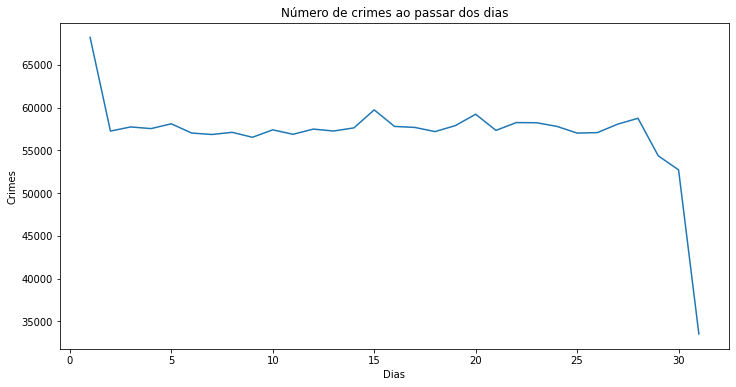

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos dias')
plt.ylabel('Crimes')
plt.xlabel('Dias')
sns.lineplot(x=df['Day'].value_counts().index,y=df['Day'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar dos meses'}, xlabel='Mês', ylabel='Crimes'>

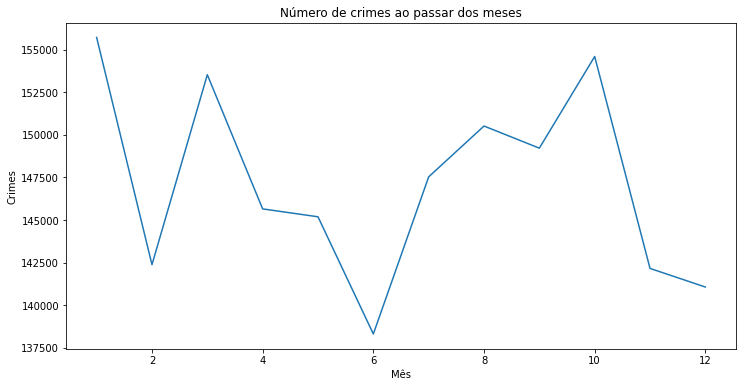

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos meses')
plt.ylabel('Crimes')
plt.xlabel('Mês')
sns.lineplot(x=df['Month'].value_counts().index,y=df['Month'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar dos anos'}, xlabel='Ano', ylabel='Crimes'>

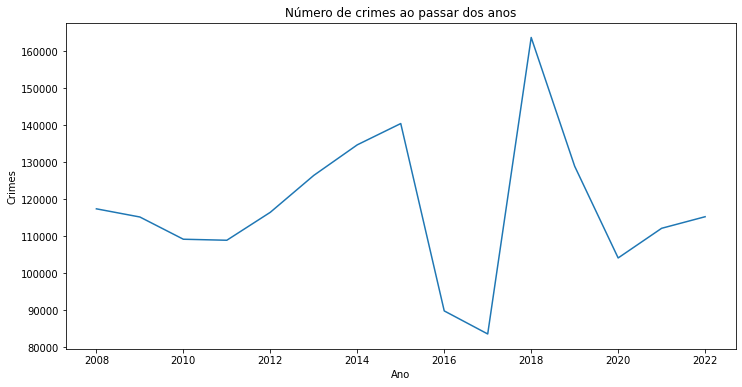

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos anos')
plt.ylabel('Crimes')
plt.xlabel('Ano')
sns.lineplot(x=df['Year'].value_counts().index,y=df['Year'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar das horas'}, xlabel='Horas', ylabel='Crimes'>

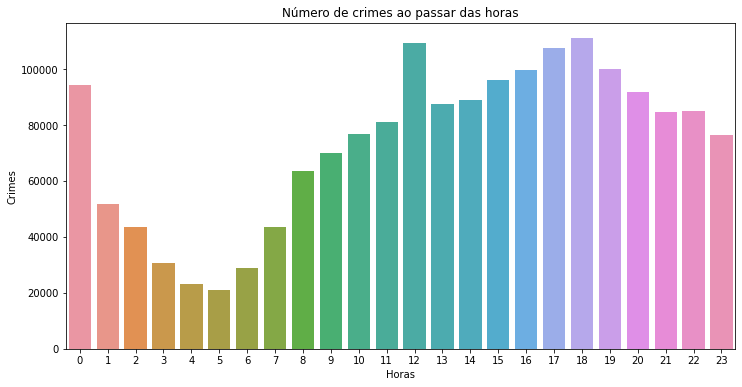

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar das horas')
plt.ylabel('Crimes')
plt.xlabel('Horas')
sns.barplot(x=df['Time'].value_counts().index,y=df['Time'].value_counts().values)

<Axes: title={'center': 'Top 5 crimes'}, xlabel='Crimes'>

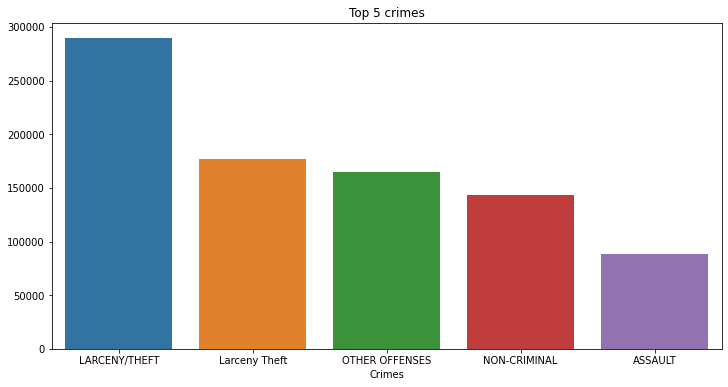

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Top 5 crimes')
plt.ylabel('')
plt.xlabel('Crimes')
sns.barplot(x= df['Category'].value_counts().index[:5], y = df['Category'].value_counts().values[0:5])

In [ ]:
dias = {
    'Sunday':0,
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6
}

contagemDias = df['DayOfWeek'].value_counts().rename(index=dias).sort_index()
contagemDias

0    237489
1    245717
2    248508
3    257686
4    250136
5    269407
6    256922
Name: DayOfWeek, dtype: int64

<Axes: title={'center': 'Número de crimes por dia da semana (0 como domingo)'}, xlabel='Dias', ylabel='Crimes'>

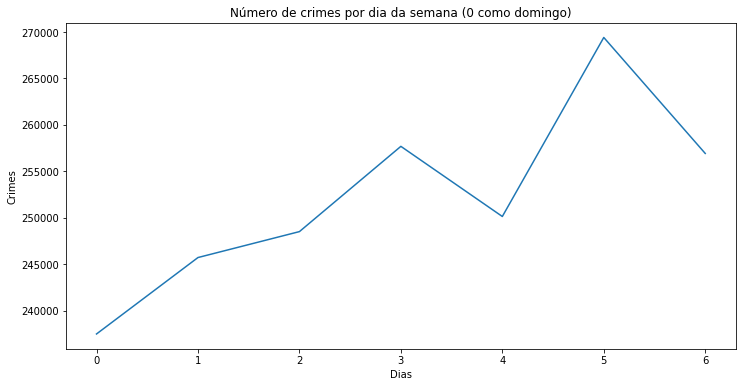

In [ ]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes por dia da semana (0 como domingo)')
plt.ylabel('Crimes')
plt.xlabel('Dias')
sns.lineplot(x=contagemDias.index,y=contagemDias.values)

In [ ]:
newDf = df.filter(['Year','Month','Category'], axis=1)
newDfff = pd.DataFrame(columns= ['Year', 'Month', 'Count'])
for i in range(2008, 2023):
  index = df.index
  index = index[df['Year'] == i].tolist()
  train = newDf.iloc[index, :]
  
  newDff = pd.DataFrame(columns= ['Year', 'Month', 'Count'])
  newDff['Year'] = np.ones(12) * i
  newDff['Month'] = train['Month'].value_counts().index
  newDff['Count'] = train['Month'].value_counts().values
  newDfff = pd.concat([newDff, newDfff])

tabela_pivot = newDfff.pivot_table(index='Year', columns='Month', values = 'Count')
tabela_pivot

Month        1        2        3        4        5        6        7   \
Year                                                                    
2008.0   9876.0   9100.0  10260.0   9552.0   9899.0   8985.0  10321.0   
2009.0   9837.0   8790.0  10362.0   9940.0   9202.0   8533.0   9509.0   
2010.0   9270.0   8413.0   8960.0   8513.0   9474.0   8904.0   9074.0   
2011.0   9430.0   8151.0   9414.0   9097.0   9382.0   8933.0   8933.0   
2012.0   9568.0   8960.0   9448.0   9208.0   9818.0   9172.0   9583.0   
2013.0  10469.0   9684.0  10690.0  10278.0  10542.0  10237.0  10814.0   
2014.0  11504.0  10218.0  11495.0  11073.0  10961.0  10639.0  11391.0   
2015.0  12191.0  11047.0  12546.0  11632.0  12436.0  11920.0  12003.0   
2016.0   7033.0   8814.0   9030.0   8021.0   6941.0   6348.0   7165.0   
2017.0   6667.0   6398.0   7242.0   6144.0   6202.0   6121.0   6735.0   
2018.0  20141.0  16801.0  17610.0  17257.0  12985.0  10782.0  11976.0   
2019.0  10570.0   9431.0  10162.0  10308.0  10629.0  10500.0  11303.0   
2020.0  10808.0   9998.0   8361.0   7108.0   8385.0   8063.0   8718.0   
2021.0   9159.0   8191.0   8358.0   8237.0   9263.0   9550.0   9721.0   
2022.0   9194.0   8382.0   9592.0   9284.0   9070.0   9622.0  10287.0   

Month        8        9        10       11       12  
Year                                                 
2008.0   9603.0  10043.0  10744.0   9770.0   9221.0  
2009.0  10770.0  10155.0   9930.0   9332.0   8808.0  
2010.0   9579.0   9705.0   9671.0   8808.0   8793.0  
2011.0   9202.0   9178.0   9399.0   8697.0   9074.0  
2012.0  10185.0   9908.0  10958.0   9926.0   9703.0  
2013.0  11261.0  11518.0  11424.0  10104.0   9379.0  
2014.0  12086.0  11214.0  12081.0  10930.0  11057.0  
2015.0  12342.0  11571.0  11766.0  10737.0  10207.0  
2016.0   6624.0   8236.0   7327.0   6816.0   7460.0  
2017.0   6814.0   6801.0   8476.0   7901.0   8085.0  
2018.0  12088.0  11118.0  11583.0  10491.0  10806.0  
2019.0  11784.0  11251.0  11869.0  10522.0  10548.0  
2020.0   8490.0   8070.0   8523.0   8661.0   8925.0  
2021.0   9532.0   9882.0  10527.0  10072.0   9626.0  
2022.0  10157.0  10568.0  10321.0   9391.0   9373.0

<ErrorbarContainer object of 3 artists>

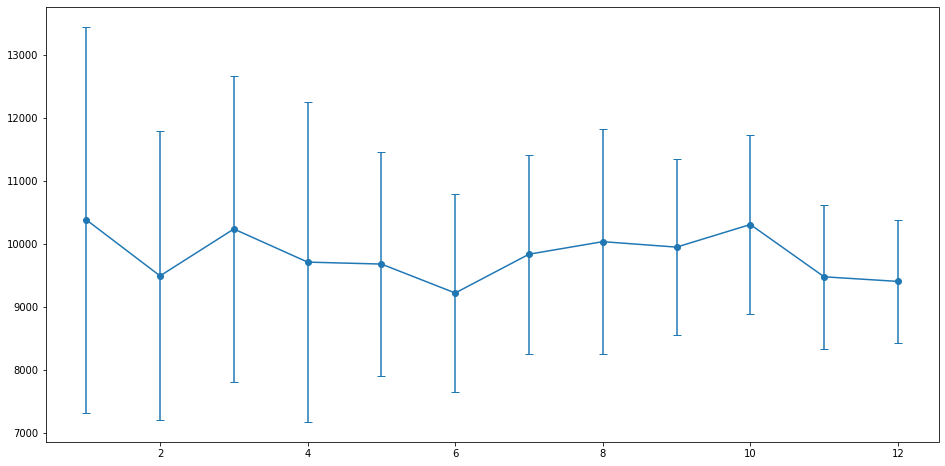

In [ ]:
plt.figure(figsize=(16,8))                                                  
plt.errorbar(x=tabela_pivot.mean(axis=0).index, y=tabela_pivot.mean(axis=0).values, yerr=tabela_pivot.std(axis=0), fmt='-o', capsize= 4.0)

#**Folium e GeoPandas**

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
from shapely.geometry import Point

In [ ]:
mapa = gpd.read_file('/content/drive/MyDrive/SF Find Neighborhoods.zip (Unzipped Files)/geo_export_1e0a72d7-85f1-4091-924b-eb8389c0d1d7.shp')
mapa.crs = 'EPSG:7131'
mapa

link  \
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...   
1                                                  NaN   
2                    http://www.nps.gov/prsf/index.htm   
3                                                  NaN   
4    http://www.sfgate.com/neighborhoods/sf/innerri...   
..                                                 ...   
112  http://en.wikipedia.org/wiki/Corona_Heights,_S...   
113        http://en.wikipedia.org/wiki/Haight-Ashbury   
114  http://en.wikipedia.org/wiki/Eureka_Valley,_Sa...   
115  http://en.wikipedia.org/wiki/St._Francis_Wood,...   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...   

                       name                                           geometry  
0                  Seacliff  POLYGON ((-122.493 37.784, -122.494 37.787, -1...  
1               Lake Street  POLYGON ((-122.487 37.784, -122.487 37.786, -1...  
2    Presidio National Park  POLYGON ((-122.478 37.811, -122.477 37.811, -1...  
3          Presidio Terrace  POLYGON ((-122.472 37.787, -122.471 37.788, -1...  
4            Inner Richmond  POLYGON ((-122.473 37.786, -122.467 37.787, -1...  
..                      ...                                                ...  
112          Corona Heights  POLYGON ((-122.435 37.763, -122.435 37.763, -1...  
113         Ashbury Heights  POLYGON ((-122.452 37.761, -122.452 37.762, -1...  
114           Eureka Valley  POLYGON ((-122.437 37.762, -122.437 37.759, -1...  
115        St. Francis Wood  POLYGON ((-122.472 37.735, -122.468 37.737, -1...  
116         Sherwood Forest  POLYGON ((-122.459 37.741, -122.459 37.741, -1...  

[117 rows x 3 columns]

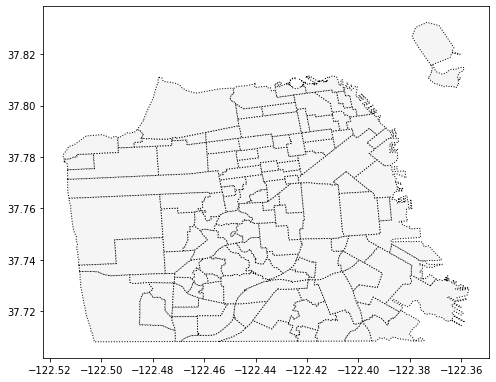

In [ ]:
ax = mapa.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')

In [ ]:
import folium
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
mapa1 = folium.Map(location = [37.76826443174238, -122.42593014802819], tiles='stamentoner',zoom_start= 12.4)

In [ ]:
mapa1

In [ ]:
### separando para consumir menos memória e obter a visualização ###

In [ ]:
df['Year'].value_counts()

2018    163638
2015    140398
2014    134649
2019    128877
2013    126400
2008    117374
2012    116437
2022    115241
2009    115168
2021    112118
2010    109164
2011    108890
2020    104110
2016     89815
2017     83586
Name: Year, dtype: int64

In [ ]:
df2017 = df.loc[df['Year'].isin([2017])].reset_index().drop(['index'], axis = 1)
df2017_12 = df2017.loc[df['Month'].isin([12])].reset_index().drop(['index'], axis = 1)

In [ ]:
df2017_12.shape

(6608, 10)

In [ ]:
HeatMap(
    data = df2017_12[['Latitude', 'Longitude']],
).add_to(mapa1)

In [ ]:
mapa1

In [ ]:
mapa2 = folium.Map(location = [37.756322095158, -122.4437824835378], tiles='stamentoner',zoom_start= 12.4)

In [ ]:
for i in range(len(df2017_12)):
  folium.Circle(
      location = [df2017_12.loc[i].Latitude, df2017_12.loc[i].Longitude],
      radius= 10,
      color = 'darkred'
  ).add_to(mapa2)

In [ ]:
mapa2

In [ ]:
mapa3 = folium.Map(location = [37.756322095158, -122.4437824835378], tiles='stamentoner',zoom_start= 12.4)

In [ ]:
mc = MarkerCluster()

for index, row in df2017_12.iterrows():
  mc.add_child(folium.Marker([row['Latitude'], row['Longitude']]))
mapa3.add_child(mc)

Text(0, 0.5, 'Latitude')

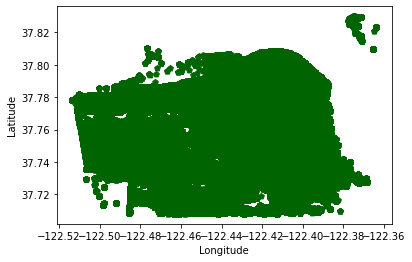

In [ ]:
plt.scatter(df.Longitude, df.Latitude,
            c = 'darkgreen', marker = 'p')
plt.xlabel('Longitude')
plt.ylabel('Latitude')